In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [9]:

class NeuralNet:
    def __init__(self, input_dim=784, l1=16, l2=16, output_dim=10, alpha=0.1):
        self.alpha = alpha
        self.W1 = np.random.randn(l1, input_dim) * 0.01
        self.b1 = np.zeros((l1, 1))
        self.W2 = np.random.randn(l2, l1) * 0.01
        self.b2 = np.zeros((l2, 1))
        self.W3 = np.random.randn(output_dim, l2) * 0.01
        self.b3 = np.zeros((output_dim, 1))

    def ReLU(self, Z):
        return np.maximum(0, Z)

    def d_ReLU(self, Z):
        return (Z > 0).astype(float)

    def softmax(self, Z):
        Z = Z - np.max(Z, axis=0, keepdims=True)
        exp_Z = np.exp(Z)
        return exp_Z/np.sum(exp_Z, axis=0, keepdims=True)

    def one_hot(self, Y):
        m = Y.size
        oh_Y = np.zeros((10, m))
        oh_Y[Y, np.arange(m)] = 1
        return oh_Y

    def forward_prop(self, X):
        Z1 = self.W1 @ X + self.b1
        A1 = self.ReLU(Z1)

        Z2 = self.W2 @ A1 + self.b2
        A2 = self.ReLU(Z2)

        Z3 = self.W3 @ A2 + self.b3
        A3 = self.softmax(Z3)

        cache = (X, Z1, A1, Z2, A2, Z3, A3)
        return A3, cache

    def backward_prop(self, cache, Y):
        X, Z1, A1, Z2, A2, Z3, A3 = cache
        Y = self.one_hot(Y)
        m = X.shape[1]

        dZ3 = A3 - Y
        dW3 = (1/m) * dZ3 @ A2.T
        db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

        dZ2 = self.W3.T @ dZ3 * self.d_ReLU(Z2)
        dW2 = (1/m) * dZ2 @ A1.T
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        dZ1 = self.W2.T @ dZ2 * self.d_ReLU(Z1)
        dW1 = (1/m) * dZ1 @ X.T
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        self.W3 -= self.alpha * dW3
        self.b3 -= self.alpha * db3
        self.W2 -= self.alpha * dW2
        self.b2 -= self.alpha * db2
        self.W1 -= self.alpha * dW1
        self.b1 -= self.alpha * db1

    def compute_loss(self, A, Y):
        Y = self.one_hot(Y)
        return -np.mean(np.sum(Y * np.log(A + 1e-9), axis=0))

    def train(self, X, Y, epochs=50):
        losses = []
        for epoch in range(epochs):
            A, cache = self.forward_prop(X)
            loss = self.compute_loss(A, Y)
            losses.append(loss)
            self.backward_prop(cache, Y)

            if epoch % 250 == 0:
                print(f"epoch {epoch}, loss {loss:.4f}")
        return losses

    def predict(self, X):
        A, _ = self.forward_prop(X)
        return np.argmax(A, axis=0)

    def accuracy(self, X, Y):
        preds = self.predict(X)
        return np.mean(preds == Y)
    

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784).T / 255.0
X_test = X_test.reshape(-1, 784).T / 255.0

In [17]:
nn = NeuralNet(alpha=0.1)
losses = nn.train(X_train, y_train, epochs=5000)
print("training accuracy: ", nn.accuracy(X_train, y_train))
print("test accuracy: ", nn.accuracy(X_test, y_test))

epoch 0, loss 2.3026
epoch 250, loss 2.3010
epoch 500, loss 2.2990
epoch 750, loss 1.6864
epoch 1000, loss 0.8309
epoch 1250, loss 0.5506
epoch 1500, loss 0.4296
epoch 1750, loss 0.3557
epoch 2000, loss 0.3109
epoch 2250, loss 0.2798
epoch 2500, loss 0.2547
epoch 2750, loss 0.2337
epoch 3000, loss 0.2158
epoch 3250, loss 0.2004
epoch 3500, loss 0.1873
epoch 3750, loss 0.1766
epoch 4000, loss 0.1678
epoch 4250, loss 0.1603
epoch 4500, loss 0.1540
epoch 4750, loss 0.1485
training accuracy:  0.9584166666666667
test accuracy:  0.95


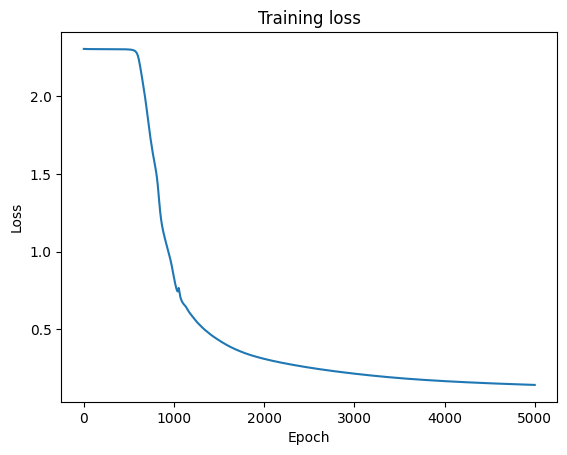

In [18]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training loss")
plt.show()


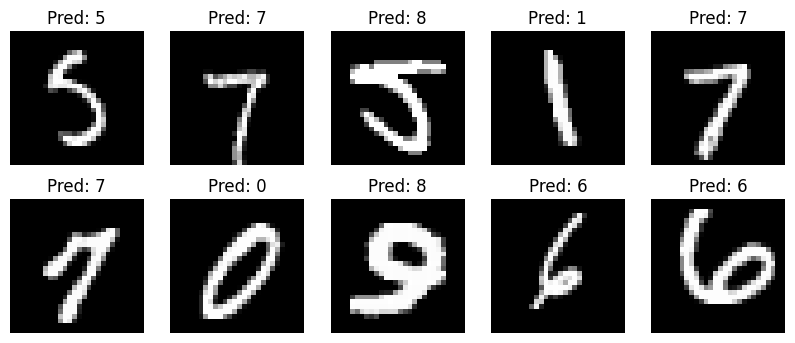

In [21]:
indices = np.random.choice(X_test.shape[1], 10, replace=False)
preds = nn.predict(X_test[:, indices])

plt.figure(figsize=(10, 4))

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[:, idx].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {preds[i]}")
    plt.axis("off")

plt.show()